# Step 3: Data Validation

Use the code below to run TensorFlow Data Validation on your pipeline.  Start by importing and opening the metadata store.

In [1]:
from __future__ import print_function

!pip install -q papermill
!pip install -q matplotlib
!pip install -q networkx

import os
import tfx_utils
%matplotlib notebook

def _make_default_sqlite_uri(pipeline_name):
    return os.path.join(os.environ['HOME'], 'airflow/tfx/metadata', pipeline_name, 'metadata.db')

def get_metadata_store(pipeline_name):
    return tfx_utils.TFXReadonlyMetadataStore.from_sqlite_db(_make_default_sqlite_uri(pipeline_name))

pipeline_name = 'daguan_nlp'

pipeline_db_path = _make_default_sqlite_uri(pipeline_name)
print('Pipeline DB:\n{}'.format(pipeline_db_path))

store = get_metadata_store(pipeline_name)

/home/tmy/anaconda3/envs/tfx-env/lib/python3.6/site-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


Pipeline DB:
/home/tmy/airflow/tfx/metadata/daguan_nlp/metadata.db


Now print out the data artifacts:

In [2]:
# Visualize properties of example artifacts
store.get_artifacts_of_type_df(tfx_utils.TFXArtifactTypes.EXAMPLES)

,URI,SPLIT,STATE,SPAN,TYPE_NAME
ID,,,,,
2,/home/tmy/airflow/tfx/pipelines/daguan_nlp/Csv...,train,published,1,ExamplesPath
3,/home/tmy/airflow/tfx/pipelines/daguan_nlp/Csv...,eval,published,1,ExamplesPath


Now visualize the dataset features.

Hint: try ID 2 or 3

In [3]:
# Visualize stats for data
store.display_stats_for_examples(2)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0703 16:57:14.479139 140271643670272 deprecation.py:323] From /home/tmy/anaconda3/envs/tfx-env/lib/python3.6/site-packages/tensorflow_data_validation/utils/stats_gen_lib.py:328: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


display shema


,Type,Presence,Valency,Domain
Feature name,,,,
'content',BYTES,required,,-
'label',BYTES,required,,-
'exfeature_ind',BYTES,required,,-
'exfeature_num',INT,required,,-
'len_cont',INT,required,,-


Now plot the artifact lineage:

<IPython.core.display.Javascript object>


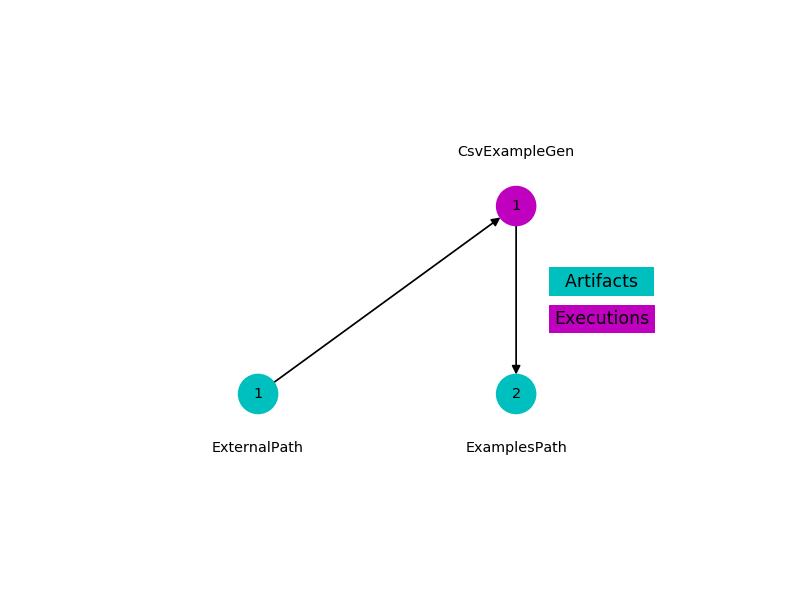

In [9]:
# Try different IDs here. Click stop in the plot when changing IDs.
%matplotlib notebook
store.plot_artifact_lineage(2)